In [1]:
# 모듈 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
df = pd.read_csv('MSD.csv') # 이전에 만들어두었던 파일 불러오기
df.head()

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
0,1,34,20,1,1,2,1,0,1,1,0,0,0,1,0,1,1
1,1,61,25,3,2,10,2,1,1,0,1,0,0,0,0,1,1
2,1,22,20,3,1,3,1,1,0,0,0,0,0,1,0,0,1
3,2,41,15,1,1,7,2,1,0,1,1,0,1,1,0,0,1
4,2,34,20,2,1,6,2,0,1,0,0,0,1,0,0,0,1


### 데이터 분리하기

In [3]:
df.columns

Index(['Gender', 'Age', 'Schooling', 'Breastfeeding', 'Varicella',
       'Initial_Symptom', 'Mono_or_Polysymptomatic', 'Oligoclonal_Bands',
       'LLSSEP', 'ULSSEP', 'VEP', 'BAEP', 'Periventricular_MRI',
       'Cortical_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI', 'group'],
      dtype='object')

In [4]:
X = df[['Gender', 'Age', 'Schooling', 'Breastfeeding', 'Varicella',
       'Initial_Symptom', 'Mono_or_Polysymptomatic', 'Oligoclonal_Bands',
       'LLSSEP', 'ULSSEP', 'VEP', 'BAEP', 'Periventricular_MRI',
       'Cortical_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI']] 
y = df['group']

### stats 모델을 사용하여 로지스틱회귀분석 진행

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size= 0.2, random_state=1234)

In [6]:
model = sm.Logit(y_train, X_train)
results = model.fit(method = 'newton')

results.summary()

# 해당 결과로 알 수 있는 것은 p값이 0.05보다 작은 값인
# Gender Schooling, Varicella, Initial_Symptom, Periventricular_MRI, Infratentorial_MRI가 유의미한 변수임을 확인할 수 있었다.

Optimization terminated successfully.
         Current function value: 0.347317
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  group   No. Observations:                  218
Model:                          Logit   Df Residuals:                      202
Method:                           MLE   Df Model:                           15
Date:                Tue, 22 Aug 2023   Pseudo R-squ.:                  0.4964
Time:                        18:52:33   Log-Likelihood:                -75.715
converged:                       True   LL-Null:                       -150.36
Covariance Type:            nonrobust   LLR p-value:                 3.332e-24
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Gender                     -1.0410      0.420     -2.478      0.013      -1.864      -0.218
Age                         0.0163      0.019      0.856      0.392      -0.021       0.054
Schooling                   0.1244      0.045      2.788      0.005       0.037       0.212
Breastfeeding              -0.3078      0.291     -1.056      0.291      -0.879       0.263
Varicella                  -0.6965      0.380     -1.831      0.067      -1.442       0.049
Initial_Symptom             0.3182      0.077      4.123      0.000       0.167       0.469
Mono_or_Polysymptomatic    -2.2037      0.562     -3.925      0.000      -3.304      -1.103
Oligoclonal_Bands           0.5365      0.390      1.376      0.169      -0.227       1.300
LLSSEP                      0.1874      0.527      0.355      0.722      -0.846       1.221
ULSSEP                     -0.2873      0.516     -0.556      0.578      -1.299       0.725
VEP                         0.7301      0.516      1.415      0.157      -0.282       1.742
BAEP                       -1.2055      0.932     -1.294      0.196      -3.032       0.621
Periventricular_MRI         1.9017      0.471      4.037      0.000       0.978       2.825
Cortical_MRI                0.7826      0.456      1.715      0.086      -0.112       1.677
Infratentorial_MRI          1.8691      0.487      3.841      0.000       0.915       2.823
Spinal_Cord_MRI             0.8155      0.533      1.530      0.126      -0.229       1.860
===========================================================================================
"""

### 범주형인 값을 get_dummies함수를 활용하여 수치로 이해할 수 있게 작업을 수행

In [7]:
df1 = pd.get_dummies(df['Breastfeeding'])
df1

,1,2,3
0,1,0,0
1,0,0,1
2,0,0,1
3,1,0,0
4,0,1,0
...,...,...,...
268,0,0,1
269,0,0,1
270,0,0,1
271,0,0,1


In [8]:
df1.columns = ['BF_1', 'BF_2', 'BF_3']
df1

,BF_1,BF_2,BF_3
0,1,0,0
1,0,0,1
2,0,0,1
3,1,0,0
4,0,1,0
...,...,...,...
268,0,0,1
269,0,0,1
270,0,0,1
271,0,0,1


In [9]:
df2 = pd.get_dummies(df['Varicella'])
df2

,1,2,3
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
268,1,0,0
269,0,0,1
270,0,0,1
271,0,0,1


In [10]:
df2.columns = ['V_1', 'V_2', 'V_3']
df2

,V_1,V_2,V_3
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
268,1,0,0
269,0,0,1
270,0,0,1
271,0,0,1


In [11]:
df3 = pd.get_dummies(df['Mono_or_Polysymptomatic'])
df3

,1,2,3
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
268,0,1,0
269,0,1,0
270,0,1,0
271,0,1,0


In [12]:
df3.columns = ['MP_1', 'MP_2', 'MP_3']
df3

,MP_1,MP_2,MP_3
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
268,0,1,0
269,0,1,0
270,0,1,0
271,0,1,0


In [13]:
df4 = pd.get_dummies(df['Oligoclonal_Bands'])
df4

,0,1,2
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
268,1,0,0
269,0,1,0
270,1,0,0
271,0,1,0


In [14]:
df4.columns = ['OB_1', '0B_2', 'OB_3']
df4

,OB_1,0B_2,OB_3
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
268,1,0,0
269,0,1,0
270,1,0,0
271,0,1,0


In [15]:
df = pd.concat([df,df1], axis = 1)
df

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group,BF_1,BF_2,BF_3
0,1,34,20,1,1,2,1,0,1,1,0,0,0,1,0,1,1,1,0,0
1,1,61,25,3,2,10,2,1,1,0,1,0,0,0,0,1,1,0,0,1
2,1,22,20,3,1,3,1,1,0,0,0,0,0,1,0,0,1,0,0,1
3,2,41,15,1,1,7,2,1,0,1,1,0,1,1,0,0,1,1,0,0
4,2,34,20,2,1,6,2,0,1,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2,31,8,3,1,9,2,0,0,0,0,0,0,0,0,0,0,0,0,1
269,1,21,15,3,3,5,2,1,0,0,0,0,0,0,0,1,0,0,0,1
270,2,19,12,3,3,13,2,0,1,1,1,0,0,0,0,1,0,0,0,1
271,2,32,15,3,3,15,2,1,1,1,1,0,1,1,1,0,0,0,0,1


In [16]:
df = pd.concat([df,df2], axis = 1)
df 

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,...,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group,BF_1,BF_2,BF_3,V_1,V_2,V_3
0,1,34,20,1,1,2,1,0,1,1,...,1,0,1,1,1,0,0,1,0,0
1,1,61,25,3,2,10,2,1,1,0,...,0,0,1,1,0,0,1,0,1,0
2,1,22,20,3,1,3,1,1,0,0,...,1,0,0,1,0,0,1,1,0,0
3,2,41,15,1,1,7,2,1,0,1,...,1,0,0,1,1,0,0,1,0,0
4,2,34,20,2,1,6,2,0,1,0,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2,31,8,3,1,9,2,0,0,0,...,0,0,0,0,0,0,1,1,0,0
269,1,21,15,3,3,5,2,1,0,0,...,0,0,1,0,0,0,1,0,0,1
270,2,19,12,3,3,13,2,0,1,1,...,0,0,1,0,0,0,1,0,0,1
271,2,32,15,3,3,15,2,1,1,1,...,1,1,0,0,0,0,1,0,0,1


In [17]:
df = pd.concat([df,df3], axis = 1)
df

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,...,group,BF_1,BF_2,BF_3,V_1,V_2,V_3,MP_1,MP_2,MP_3
0,1,34,20,1,1,2,1,0,1,1,...,1,1,0,0,1,0,0,1,0,0
1,1,61,25,3,2,10,2,1,1,0,...,1,0,0,1,0,1,0,0,1,0
2,1,22,20,3,1,3,1,1,0,0,...,1,0,0,1,1,0,0,1,0,0
3,2,41,15,1,1,7,2,1,0,1,...,1,1,0,0,1,0,0,0,1,0
4,2,34,20,2,1,6,2,0,1,0,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2,31,8,3,1,9,2,0,0,0,...,0,0,0,1,1,0,0,0,1,0
269,1,21,15,3,3,5,2,1,0,0,...,0,0,0,1,0,0,1,0,1,0
270,2,19,12,3,3,13,2,0,1,1,...,0,0,0,1,0,0,1,0,1,0
271,2,32,15,3,3,15,2,1,1,1,...,0,0,0,1,0,0,1,0,1,0


In [18]:
df = pd.concat([df,df4], axis = 1)
df

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,...,BF_3,V_1,V_2,V_3,MP_1,MP_2,MP_3,OB_1,0B_2,OB_3
0,1,34,20,1,1,2,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
1,1,61,25,3,2,10,2,1,1,0,...,1,0,1,0,0,1,0,0,1,0
2,1,22,20,3,1,3,1,1,0,0,...,1,1,0,0,1,0,0,0,1,0
3,2,41,15,1,1,7,2,1,0,1,...,0,1,0,0,0,1,0,0,1,0
4,2,34,20,2,1,6,2,0,1,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2,31,8,3,1,9,2,0,0,0,...,1,1,0,0,0,1,0,1,0,0
269,1,21,15,3,3,5,2,1,0,0,...,1,0,0,1,0,1,0,0,1,0
270,2,19,12,3,3,13,2,0,1,1,...,1,0,0,1,0,1,0,1,0,0
271,2,32,15,3,3,15,2,1,1,1,...,1,0,0,1,0,1,0,0,1,0


In [19]:
df.columns

Index(['Gender', 'Age', 'Schooling', 'Breastfeeding', 'Varicella',
       'Initial_Symptom', 'Mono_or_Polysymptomatic', 'Oligoclonal_Bands',
       'LLSSEP', 'ULSSEP', 'VEP', 'BAEP', 'Periventricular_MRI',
       'Cortical_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI', 'group',
       'BF_1', 'BF_2', 'BF_3', 'V_1', 'V_2', 'V_3', 'MP_1', 'MP_2', 'MP_3',
       'OB_1', '0B_2', 'OB_3'],
      dtype='object')

### 이후 필요 변수를 다시 리스트에 저장

In [20]:
interested =  df[['Gender', 'Age', 'Schooling', 'Initial_Symptom', 
       'LLSSEP', 'ULSSEP', 'VEP', 'BAEP', 'Periventricular_MRI',
       'Cortical_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI',
       'BF_1', 'BF_2', 'BF_3', 'V_1', 'V_2', 'V_3', 'MP_1', 'MP_2', 'MP_3',
       'OB_1', '0B_2', 'OB_3', 'group']]
interested

,Gender,Age,Schooling,Initial_Symptom,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,...,V_1,V_2,V_3,MP_1,MP_2,MP_3,OB_1,0B_2,OB_3,group
0,1,34,20,2,1,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,1
1,1,61,25,10,1,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,1
2,1,22,20,3,0,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,1
3,2,41,15,7,0,1,1,0,1,1,...,1,0,0,0,1,0,0,1,0,1
4,2,34,20,6,1,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2,31,8,9,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
269,1,21,15,5,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
270,2,19,12,13,1,1,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
271,2,32,15,15,1,1,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0


In [21]:
interested.to_csv('Mydata.csv', index = False)

### sklearn 모델을 활용하여 로지스틱회귀분석 진행

In [22]:
from sklearn.linear_model import LogisticRegression

X = df[['Gender', 'Age', 'Schooling', 'Initial_Symptom', 
       'LLSSEP', 'ULSSEP', 'VEP', 'BAEP', 'Periventricular_MRI',
       'Cortical_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI',
       'BF_1', 'BF_2', 'BF_3', 'V_1', 'V_2', 'V_3', 'MP_1', 'MP_2', 'MP_3',
       'OB_1', '0B_2', 'OB_3']]
y = df['group']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size= 0.2, random_state=1234)

In [24]:
lr = LogisticRegression(max_iter = 250) # 왜인지 오류가 나서 max_iter 수정해보았음. 흠 이론에서 나오는 learning rate는 어디에 사용되는건지 궁금
model = lr.fit(X_train, y_train)        # 우선은 성능이 올라감

### 교차검증

- 데이터를 여러 번 반복해서 나누고 여러 모델을 학습하여 성능을 평가하는 방법

In [25]:
Rid = LogisticRegression(solver = 'liblinear', penalty = 'l1', max_iter = 250) # default : l2
model1 = Rid.fit(X_train, y_train)

In [26]:
model.score(X_test, y_test)

0.8181818181818182

In [27]:
model1.score(X_test, y_test)

0.7818181818181819

In [28]:
lr.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [29]:
pre = pd.DataFrame(lr.predict(X_test))
pre

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,1


In [30]:
ans = pd.DataFrame(y_test)
ans.index = pre.index
ans

,group
0,1
1,0
2,0
3,0
4,1
5,0
6,0
7,0
8,0
9,0


In [31]:
new = pd.concat([ans, pre], axis = 1)
new

,group,0
0,1,0
1,0,0
2,0,0
3,0,0
4,1,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,1


In [32]:
print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)

coefficient =  [[-0.56529239  0.02232134  0.15742772  0.27847908  0.50005115 -0.01306494
   0.34218111 -0.78499018  1.35479794  0.75305372  1.5598365   0.36714027
   0.00718576  0.43582523 -0.44577893  0.37066087  0.39872402 -0.77215282
   0.99272496 -0.62954605 -0.36594685 -0.3374962   1.02986934 -0.69514107]]
intercept =  [-6.24477748]


### 완전탐색

- 모든 값의 조합에 대해 모델을 훈련하고 최고 성능 점수를 내는 모델이 최선의 모델

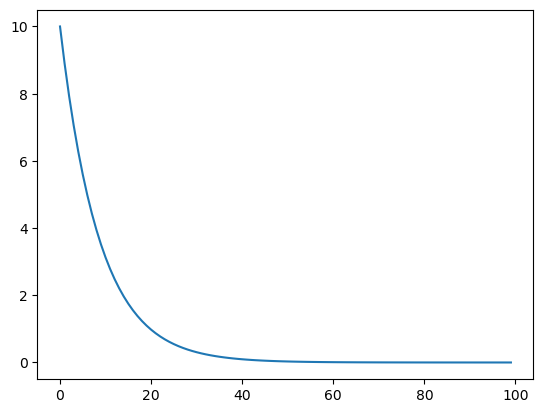

In [33]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

features = X_train
target = y_train

logistic = LogisticRegression(solver = 'lbfgs', max_iter = 10000)
penalty = ['l2']
C = np.logspace(1, -4 ,100)
hyperparameters = dict(C = C, penalty = penalty)

plt.figure()
plt.plot(C)
plt.show()

In [34]:
features = X_train
target = y_train

In [35]:
logistic = LogisticRegression(solver = 'lbfgs', max_iter = 10000)
penalty = ['l2']
C = np.logspace(1, -4 ,100)
hyperparameters = dict(C = C, penalty = penalty)

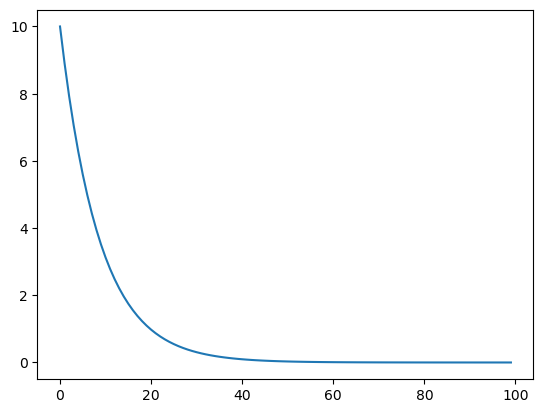

In [36]:
plt.figure()
plt.plot(C)
plt.show()

### 로지스틱 회귀모델의 하이퍼 파라미터인 C값의 가장 좋은 값을 찾기 위해 교차검증을 수행

In [37]:
gridsearch = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0) 
best_model = gridsearch.fit(features, target)  

np.logspace(0, 4, 10)

print('가장 좋은 페널티:', best_model.best_estimator_.get_params()['penalty'])
print('가장 좋은 C 값:', best_model.best_estimator_.get_params()['C'])

best_model.predict(features) 

가장 좋은 페널티: l2
가장 좋은 C 값: 1.384886371393873


array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [38]:
best_model.score(X_test, y_test) # 내가 찾은 가장 좋은 성능을 모여주는 모델

0.8181818181818182

### 릿지회귀, 라쏘회귀란
- 선형회귀 모델에 규제를 합쳐서 만든 모델

###### 릿지
- 계수를 제곱한 값을 기준으로 규제 적용

###### 라쏘
- 계수의 절대값을 기준으로 규제 적용

In [39]:
from sklearn.linear_model import Ridge

In [40]:
ridge = Ridge()

ridge.fit(X_train, y_train)

print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.5542295392863561
0.48058433619396523


In [41]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    train_score.append(ridge.score(X_train, y_train))
    test_score.append(ridge.score(X_test, y_test))
print(train_score)
print(test_score)

[0.5543766670985069, 0.55437665034977, 0.5543749984287033, 0.5542295392863561, 0.5473759410684693, 0.44920910875752285]
[0.48053514916525797, 0.4805378666770891, 0.480562420372874, 0.48058433619396523, 0.4728221789170367, 0.3794391218143911]


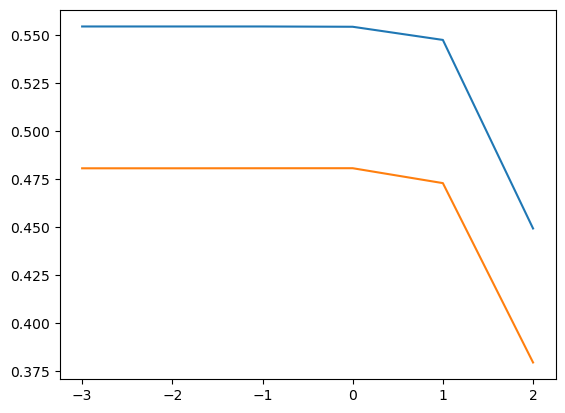

In [42]:
import matplotlib.pyplot as plt

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [43]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.0
-7.013999943872307e-05
